In [469]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [470]:
data = pd.read_csv('datasets/data.csv')
info = pd.read_csv('datasets/info.csv')

In [471]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10235 entries, 0 to 10234
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           10235 non-null  int64 
 1   source_id    10235 non-null  object
 2   title        10235 non-null  object
 3   hour         10235 non-null  object
 4   top_article  10235 non-null  bool  
 5   reactions    10235 non-null  int64 
 6   comments     10235 non-null  int64 
 7   shares       10235 non-null  int64 
dtypes: bool(1), int64(4), object(3)
memory usage: 569.8+ KB


In [472]:
info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        11 non-null     object
 1   name      11 non-null     object
 2   articles  11 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 392.0+ bytes


In [473]:
#setting ids
data.set_index('id', inplace=True)
info.set_index('id', inplace=True)

In [474]:
#Reconverting dtypes object -> string
objcol = info.select_dtypes('object').columns
info[objcol] = info[objcol].astype('string')

## Normalizing interactions

In [475]:
intcols = data.select_dtypes('int64').columns
data[intcols] = data[intcols].astype('float64')

engagement_col = data.select_dtypes('float64').columns
grouped_data = {}

for key, item in data.groupby('source_id'):
    grouped_data[key] = item

In [476]:
#calculating relative weights and normalizing

for itype in engagement_col:
    info['tot_' + itype] = 0

for key, item in grouped_data.items():
    grouped_data[key]['interactions'] = 0.0
    for itype in engagement_col:
        info['tot_' + itype][key] = item[itype].sum()
        grouped_data[key][itype] = item[itype]/info['tot_' + itype][key]/engagement_col.size
        grouped_data[key]['interactions'] += grouped_data[key][itype]

<ipython-input-476-fbf922d863a8>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  info['tot_' + itype][key] = item[itype].sum()


In [477]:
info

,name,articles,tot_reactions,tot_comments,tot_shares
id,,,,,
reuters,Reuters,1252,16963,7101,647095
the-irish-times,The Irish Times,1116,26838,10514,6947
al-jazeera-english,Al Jazeera English,499,140410,46005,36031
bbc-news,BBC News,1242,545396,207558,200636
abc-news,ABC News,1139,343779,102708,82662
the-new-york-times,The New York Times,983,789908,215853,241348
cnn,CNN,1132,1218206,344894,327778
cbs-news,CBS News,952,459741,170960,108155
newsweek,Newsweek,539,93167,32426,29067


In [478]:
grouped_data

{'abc-news':       source_id                                              title       hour  \
 id                                                                              
 5      abc-news  'This Tender Land' is an affecting story about...  15:56:49Z   
 27     abc-news  Woman survives 80-foot cliff fall in South Dak...  15:56:26Z   
 33     abc-news  Hurricane Dorian has weakened to a Category 2 ...  14:57:39Z   
 36     abc-news  Israel sends firefighters to help Brazil battl...  14:48:11Z   
 53     abc-news  Chinese 'deepfake' app Zao comes under fire ov...  17:50:55Z   
 ...         ...                                                ...        ...   
 10405  abc-news  16 paratroopers hospitalized after training ju...  12:59:00Z   
 10415  abc-news  Spain launches $330 million plan after Thomas ...  15:43:42Z   
 10420  abc-news  Ricardo Mazalan to head AP’s photo coverage in...  13:48:02Z   
 10428  abc-news  Disney Cruise Line Begins Sailings from New Yo...  17:00:59Z   
 104

In [479]:
#Grouping by hour
hourly_data = {}

for source, group in grouped_data.items():
    group['hour'] = group['hour'].map(lambda x : x.split(':')[0])
    temp = {}
    for key, item in group.groupby('hour'):
        temp[key] = item.interactions.sum()
    hourly_data[source] = pd.Series(temp)
hourly_data

{'abc-news': 00    0.016664
 01    0.010532
 02    0.003013
 03    0.001167
 04    0.001237
 05    0.001592
 06    0.009710
 07    0.001826
 08    0.004268
 09    0.007137
 10    0.042420
 11    0.044432
 12    0.072573
 13    0.105736
 14    0.049220
 15    0.387316
 16    0.164624
 17    0.072496
 18    0.004017
 19    0.000020
 dtype: float64,
 'al-jazeera-english': 00    0.017321
 01    0.015697
 02    0.014924
 03    0.006086
 04    0.078462
 05    0.164242
 06    0.093905
 07    0.100921
 08    0.091942
 09    0.075750
 10    0.041023
 11    0.089340
 12    0.063164
 13    0.039205
 14    0.022912
 15    0.018385
 16    0.034922
 17    0.001613
 18    0.030037
 19    0.000148
 dtype: float64,
 'bbc-news': 00    0.047848
 01    0.011743
 03    0.006481
 04    0.002804
 05    0.221738
 06    0.000892
 07    0.003694
 08    0.002763
 09    0.005093
 10    0.051948
 11    0.179441
 12    0.038728
 13    0.036454
 14    0.279878
 15    0.042137
 16    0.058375
 17    0.009201
 18    0

## Plotting

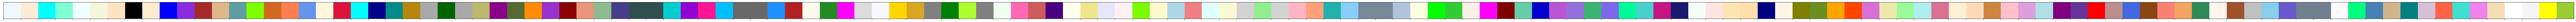

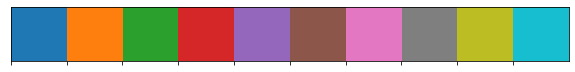

In [480]:
import matplotlib.colors as mcolors
sns.palplot(mcolors.CSS4_COLORS)
sns.palplot(mcolors.TABLEAU_COLORS)

In [481]:
#colors will start from black
colors = list(mcolors.CSS4_COLORS)
colors

['aliceblue',
 'antiquewhite',
 'aqua',
 'aquamarine',
 'azure',
 'beige',
 'bisque',
 'black',
 'blanchedalmond',
 'blue',
 'blueviolet',
 'brown',
 'burlywood',
 'cadetblue',
 'chartreuse',
 'chocolate',
 'coral',
 'cornflowerblue',
 'cornsilk',
 'crimson',
 'cyan',
 'darkblue',
 'darkcyan',
 'darkgoldenrod',
 'darkgray',
 'darkgreen',
 'darkgrey',
 'darkkhaki',
 'darkmagenta',
 'darkolivegreen',
 'darkorange',
 'darkorchid',
 'darkred',
 'darksalmon',
 'darkseagreen',
 'darkslateblue',
 'darkslategray',
 'darkslategrey',
 'darkturquoise',
 'darkviolet',
 'deeppink',
 'deepskyblue',
 'dimgray',
 'dimgrey',
 'dodgerblue',
 'firebrick',
 'floralwhite',
 'forestgreen',
 'fuchsia',
 'gainsboro',
 'ghostwhite',
 'gold',
 'goldenrod',
 'gray',
 'green',
 'greenyellow',
 'grey',
 'honeydew',
 'hotpink',
 'indianred',
 'indigo',
 'ivory',
 'khaki',
 'lavender',
 'lavenderblush',
 'lawngreen',
 'lemonchiffon',
 'lightblue',
 'lightcoral',
 'lightcyan',
 'lightgoldenrodyellow',
 'lightgray',
 

In [482]:
info['color'] = ""

for i in range(info.index.size):
    info['color'][i] = colors[i + 7]
    
info

<ipython-input-482-a0fba849c52a>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  info['color'][i] = colors[i + 7]


,name,articles,tot_reactions,tot_comments,tot_shares,color
id,,,,,,
reuters,Reuters,1252,16963,7101,647095,black
the-irish-times,The Irish Times,1116,26838,10514,6947,blanchedalmond
al-jazeera-english,Al Jazeera English,499,140410,46005,36031,blue
bbc-news,BBC News,1242,545396,207558,200636,blueviolet
abc-news,ABC News,1139,343779,102708,82662,brown
the-new-york-times,The New York Times,983,789908,215853,241348,burlywood
cnn,CNN,1132,1218206,344894,327778,cadetblue
cbs-news,CBS News,952,459741,170960,108155,chartreuse
newsweek,Newsweek,539,93167,32426,29067,chocolate


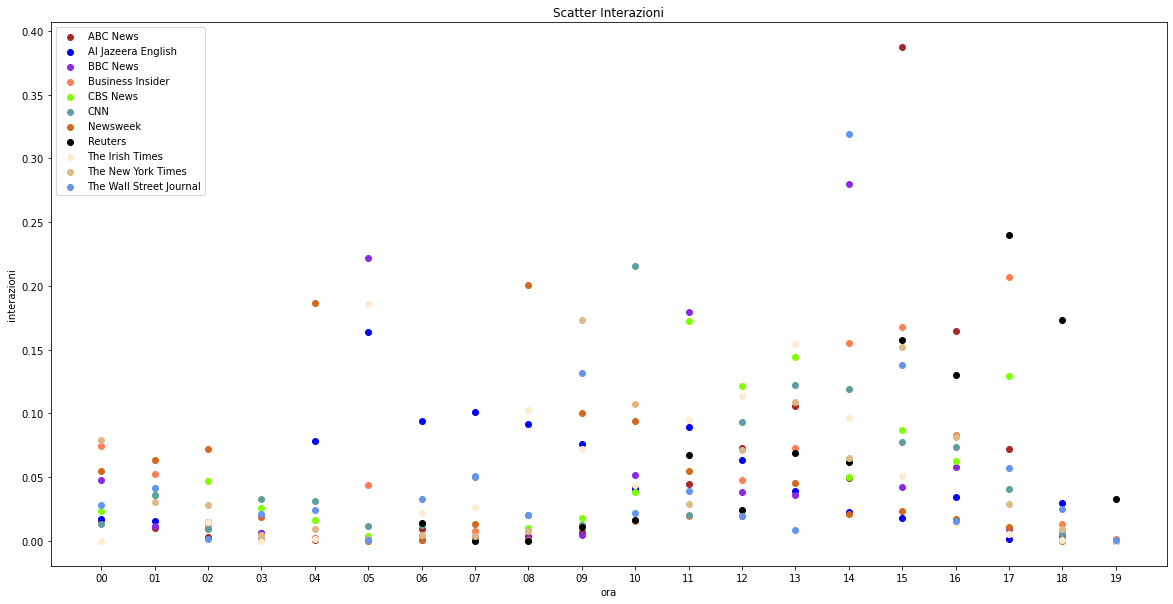

In [484]:
   #Creating a figure with one axes for each news source. 
nsources = info.index.size
fig = plt.figure(figsize=(20, 10.0)) 

ax = fig.add_subplot(111)
ax.set_xlabel('ora')
ax.set_ylabel('interazioni')
ax.set_title('Scatter Interazioni')

for key, item in hourly_data.items():
    ax.scatter(item.index, item.values, c = info['color'][key], label = info['name'][key])
     
fig.set_facecolor('w')
plt.legend(loc='upper left');

## Saving

In [485]:
info.to_csv('datasets/info2.csv')

In [486]:
fig.savefig('img/scatter_interazioni.jpg', bbox_inches='tight', dpi=300)

In [487]:
for key, item in hourly_data.items():
    item.to_csv('datasets/scatter/' + str(key) + '.csv')